# Drosophila Melanogaster - Octomilka obecná

## Jakub Víglaský

![drosophila](http://www.yourgenome.org/sites/default/files/styles/banner/public/banners/stories/fruit-flies-in-the-laboratory/single-fruit-fly-drosophila-melanogaster-on-white-background-cropped.jpg?itok=3pTTh8c5)


Octomilka obecná (Drosophila melanogaster), **čeleď** octomilkovití, **řád** dvoukřídlí (Diptera). Druhové jméno pochází z řečtiny a znamená "černobřichá". Drosophily, tzv. "banánové" nebo "ovocné mušky", jsou využívány jako laboratorní zvířata nebo krmivo, ale především jako nejrozšířenější modelové organismy v biologii a v genetických studiích, fyziologii a evoluční biologii.  
Pro laboratorní a chovatelské (krmivo) účely se z praktických důvodů často používá bezkřídlá mutace.

Původní (divoká) forma octomilky obecné má jasně červené oči a je dlouhá 2 až 3 mm. Vyskytuje se na kvasícím ovoci, marmeládách, ovocných šťávách apod. Beznohé larvy jsou dlouhé přibližně 7 mm a žijí v hnijící dužnině ovoce.

Zdroj: [https://cs.wikipedia.org/wiki/Octomilka_obecn%C3%A1](https://cs.wikipedia.org/wiki/Octomilka_obecn%C3%A1)

 Křídla má široká, v klidu složená na zadečku, který jen málo přečnívají. Má proměnu dokonalou. Samička klade během 10-15 dnů až 350 oválných, bílých vajíček, velkých kolem 0,5 mm, na měkké ovoce, kompoty, marmelády nebo kvasící tekutiny. Larvy se z nich líhnou za 3 dny a jsou protáhlé, vzrostlé, až 8 mm velké, se zakrnělou hlavou. Kuklí se za 3 týdny a dospělí jedinec se líhne po 5-10 dnech dle okolní teploty. Délka života dospělce je 2-9 týdnů.
 
 Zdroj: [http://cit.vfu.cz/vet-ekologie/rozdeleni_skudcu/octomilky.htm](http://cit.vfu.cz/vet-ekologie/rozdeleni_skudcu/octomilky.htm)

### Obsah:

1. Koľko má chromozómov?
2. Koľko má génov?
3. Aké veľké sú gény?
3. Koľko génov majú jednotlivé chromozómy?
4. Koľko má transkriptov?
5. Koľko transkriptov majú jednotilvé chromozómy?
6. Koľko transkriptov majú jednotlivé gény?
7. Koľko exónov majú transkipty?

#### Úprava dát na analýzu

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as pylt
import matplotlib.mlab as  mlab
import pylab as pl
import re 

In [2]:
gene = pd.read_table("C:/Users/Gabika/Documents/Python/drosophila_melanogaster_gene.gtf", header=None)
trans = pd.read_table("C:/Users/Gabika/Documents/Python/drosophila_melanogaster_transcript.gtf", header=None)
exon = pd.read_table("C:/Users/Gabika/Documents/Python/drosophila_melanogaster_exon.gtf", header=None)

gene.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
trans.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
exon.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [3]:
def parse_attributes(attributes_str):
    
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotypparse_attributes(s)e"
                          "gene_version"
                          "exon_version"])
    
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out


In [6]:
def split_attribute_column(df):
    """Rozdělí sloupec `attribute` data frame GTF souboru do vlastních
    sloupců.
    """
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

gene = split_attribute_column(gene)
trans = split_attribute_column(trans)
exon = split_attribute_column(exon)

AttributeError: 'DataFrame' object has no attribute 'attribute'

In [7]:
gene["seqname"].unique()

array(['3R', '3L', '2R', 'X', '2L', 'Y', '4', 'dmel_mitochondrion_genome',
       'Unmapped_Scaffold_8', 'rDNA', '211000022280328', '211000022278498',
       '211000022278875', '211000022279446', '211000022278279',
       '211000022279681', '211000022280645', '211000022280494',
       '211000022280703', '211000022280481', '211000022279188',
       '211000022278724', '211000022278436', '211000022278282',
       '211000022278664', '211000022280133', '211000022278522',
       '211000022278879', '211000022278449', '211000022280347',
       '211000022278298', '211000022278307', '211000022279529',
       '211000022280341', '211000022279392', '211000022278604',
       '211000022279708', '211000022279528', '211000022279531',
       '211000022279555', '211000022278760', '211000022279222',
       '211000022278750', '211000022278877', '211000022279055',
       '211000022279165', '211000022279108', '211000022278309',
       '211000022278603', '211000022278880', '211000022278878',
       '211000022

In [8]:
chromosomes = ['3R', '3L', '2R', 'X', '2L', 'Y', '4']
gene = gene[gene["seqname"].isin(chromosomes)]
trans = trans[trans["seqname"].isin(chromosomes)]
exon = exon[exon["seqname"].isin(chromosomes)]

Koľko má chromozómov?

Drosophila melanogaster má 4 chromozómy. Pohlavie závisí od tzv. X:A ratio a nie od prítomnostichromozómu Y. Ten však obsahuje gény spojené so samčími funkciami.

https://en.wikipedia.org/wiki/Drosophila_melanogaster

![chromozom](http://www.barnardhealth.us/drosophila-melanogaster/images/2057_2_1-chromosomes-drosophila.jpg)

In [9]:
chromosomes

['3R', '3L', '2R', 'X', '2L', 'Y', '4']

Koľko má génov?

In [10]:
gene.shape

(17453, 11)

In [11]:
len(gene['gene_name'].unique())

17453

Aké veľké sú gény?

In [12]:

gene['gene_size'] = gene['end'] - gene['start']
gene.head()

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
0,3R,FlyBase,gene,722370,722621,.,-,.,pseudogene,FBgn0085804,CR41571,251
1,3R,FlyBase,gene,835381,2503907,.,+,.,protein_coding,FBgn0267431,CG45784,1668526
2,3R,FlyBase,gene,1031171,1031354,.,+,.,pseudogene,FBgn0039987,CR12798,183
3,3R,FlyBase,gene,2156916,2157206,.,-,.,pseudogene,FBgn0058182,CR40182,290
4,3R,FlyBase,gene,2554124,3263573,.,-,.,protein_coding,FBgn0267430,CG45783,709449


In [13]:
gene.sort_values('gene_size').head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
13805,X,FlyBase,gene,23291700,23291729,.,+,.,rRNA,FBgn0267524,2SrRNA:CR45864,29
13795,X,FlyBase,gene,23214040,23214069,.,+,.,pseudogene,FBgn0267518,2SrRNA-Psi:CR45858,29
13791,X,FlyBase,gene,23205409,23205438,.,+,.,pseudogene,FBgn0085765,2SrRNA-Psi:CR40677,29
17189,2L,FlyBase,gene,21680670,21680700,.,-,.,lincRNA,FBgn0065100,snmRNA:254,30
16735,2L,FlyBase,gene,19403535,19403568,.,-,.,lincRNA,FBgn0065096,snmRNA:359,33


Koľko génov majú jednotlivé chromozómy?

In [14]:
gene_chr = gene['seqname'].value_counts()
gene_chr

3R    4125
2R    3601
2L    3465
3L    3433
X     2647
4      111
Y       71
Name: seqname, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'gcf'

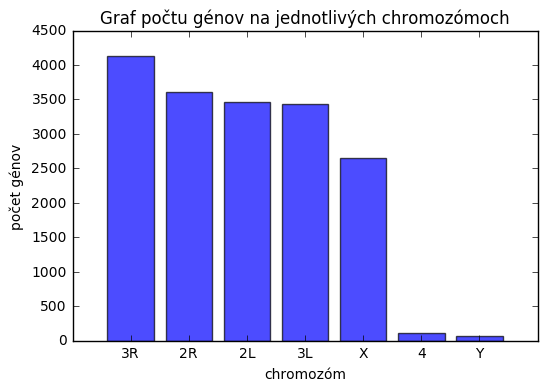

In [17]:
%matplotlib inline
y_pos = np.arange(7)
pylt.bar(y_pos, gene_chr,align='center', alpha=0.7) 
pylt.xticks(y_pos, ["3R","2R","2L","3L","X","4","Y"])
pylt.ylabel('počet génov')
pylt.xlabel("chromozóm")
pylt.title('Graf počtu génov na jednotlivých chromozómoch')
for ax in plt.gcf().axes:
    pylt.sca(ax)
    pylt.xticks(ax.get_xticks(), rotation=0)
pylt.show()

Koľko má transkriptov?

In [18]:
trans.shape

(34633, 13)

In [19]:
len(trans['transcript_id'].unique())

34633

Koľko transkriptov majú jednotlivé chromozómy?

In [20]:
trans_chr = trans['seqname'].value_counts()
trans_chr

3R    8010
2R    6927
3L    6676
2L    6632
X     5973
4      343
Y       72
Name: seqname, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'gcf'

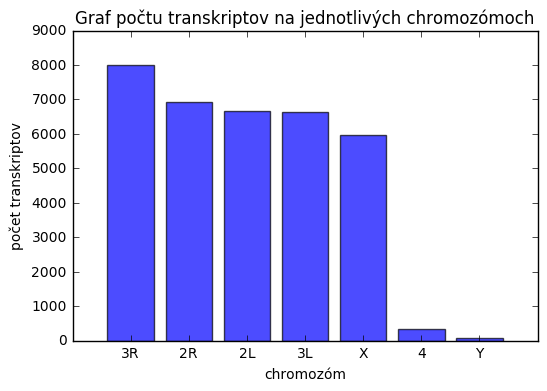

In [21]:
y_pos = np.arange(7)
pylt.bar(y_pos, trans_chr,align='center', alpha=0.7) 
pylt.xticks(y_pos, ["3R","2R","2L","3L","X","4","Y"])
pylt.ylabel('počet transkriptov')
pylt.xlabel("chromozóm")
pylt.title('Graf počtu transkriptov na jednotlivých chromozómoch')
for ax in plt.gcf().axes:
    pylt.sca(ax)
    pylt.xticks(ax.get_xticks(), rotation=0)
pylt.show()

Koľko transkiptov majú jednotlivé gény?

In [22]:
transs = trans['gene_name'].value_counts()
transs.to_csv('C:/Users/Gabika/Documents/Python/transs.gtf')
transs = pd.read_csv('C:/Users/Gabika/Documents/Python/transs.gtf', header=None)
transs.columns = ['name', 'count']
transs.sort_values(['name']).to_csv('C:/Users/Gabika/Documents/Python/transs.gtf')
transs = pd.read_csv('C:/Users/Gabika/Documents/Python/transs.gtf')

In [23]:
transs.sort_values(['count'], ascending=False).head()

,Unnamed: 0,name,count
10983,0,Dscam1,75
15990,1,para,60
6119,2,CG45186,31
15333,5,lola,25
13752,3,Sxl,25


Najviac transkriptov má gén Dscam1. Mnoho jeho alel je letálnych počas vývoja.

http://flybase.org/reports/FBgn0033159.html

Koľko exonov majú jednotlivé transkripty?

In [24]:
exons = exon['transcript_name'].value_counts()
exons.to_csv('C:/Users/Gabika/Documents/Python/exons.gtf')
exons = pd.read_csv('C:/Users/Gabika/Documents/Python/exons.gtf', header=None)
exons.columns = ['name', 'count']
exons.sort_values(['name']).to_csv('C:/Users/Gabika/Documents/Python/exons.gtf')
exons = pd.read_csv('C:/Users/Gabika/Documents/Python/exons.gtf')

In [25]:
exons.sort_values(['count'], ascending=False).head()

,Unnamed: 0,name,count
28044,1,dp-RO,82
28046,0,dp-RQ,82
28047,2,dp-RR,81
28051,3,dp-RV,80
28048,4,dp-RS,78


Najviac exonov majú transkripty génu DP, ktoré kódujú DP transkripčný faktor. 

http://flybase.org/reports/FBgn0011763.html

In [26]:
gene.sort_values(['gene_name']).to_csv('C:/Users/Gabika/Documents/Python/drosophila_melanogaster_gene1.gtf')
gene1 = pd.read_csv('C:/Users/Gabika/Documents/Python/drosophila_melanogaster_gene1.gtf')
gene1.head()

,Unnamed: 0,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,gene_size
0,8665,2R,FlyBase,gene,12037298,12038851,.,+,.,protein_coding,FBgn0010339,128up,1553
1,2118,3R,FlyBase,gene,18242531,18250550,.,+,.,protein_coding,FBgn0020238,14-3-3epsilon,8019
2,8376,2R,FlyBase,gene,10099677,10109687,.,+,.,protein_coding,FBgn0004907,14-3-3zeta,10010
3,1527,3R,FlyBase,gene,14124163,14125548,.,-,.,protein_coding,FBgn0010340,140up,1385
4,13793,X,FlyBase,gene,23211192,23213166,.,+,.,pseudogene,FBgn0085813,18SrRNA-Psi:CR41602,1974


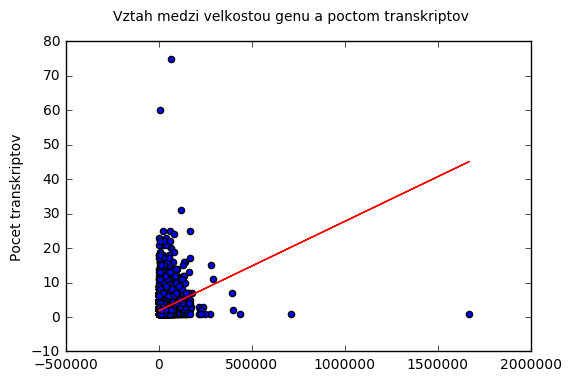

In [27]:
fig,ax = plt.pyplot.subplots()
fit = np.polyfit(gene1['gene_size'], transs["count"], deg=1)
ax.plot(gene1["gene_size"],  fit[0] * gene1["gene_size"] + fit[1], color='red')
ax.scatter(gene1["gene_size"], transs["count"])
ax.set_ylabel("Pocet transkriptov")
pl.suptitle("Vztah medzi velkostou genu a poctom transkriptov")

Koľko exonov majú jednotlivé chromozómy? 

In [28]:
exon_chr = exon['seqname'].value_counts()
exon_chr

3R    43159
2R    38551
3L    34347
X     34136
2L    32747
4      3165
Y       182
Name: seqname, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'gcf'

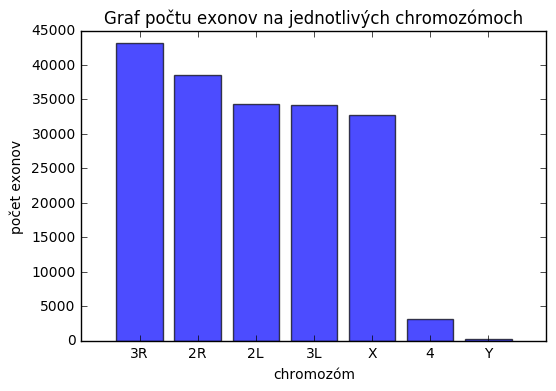

In [29]:
y_pos = np.arange(7)
pylt.bar(y_pos, exon_chr,align='center', alpha=0.7) 
pylt.xticks(y_pos, ["3R","2R","2L","3L","X","4","Y"])
pylt.ylabel('počet exonov')
pylt.xlabel("chromozóm")
pylt.title('Graf počtu exonov na jednotlivých chromozómoch')
for ax in plt.gcf().axes:
    pylt.sca(ax)
    pylt.xticks(ax.get_xticks(), rotation=0)
pylt.show()

Na štvrtom chromozóme sa nachádza jeden veľmi dôležitý gén, pax6. Tento gén je dôležitý pri vývoji očí. Paradoxne sa nazýva bezoký (eyeless)

http://flybase.org/reports/FBgn0005558.html